## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequencyâ€“inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.



---------------------------------------

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import networkx as nx
sns.set(color_codes=True)
sns.set_style("whitegrid")
%matplotlib inline

In [6]:
df = pd.read_csv('lalonde.csv')

# We add a column which contains the race as three values: black, hispanic or white rather than have binary values shared by
# the column black and the column hispan
df['race'] = 'white'
df.loc[df.black == 1, 'race'] = 'black'
df.loc[df.hispan == 1, 'race'] = 'hispanic'
df = df.drop(['black', 'hispan'], axis=1)

# Question 1: Propensity score matching
#### 1. Naive analysis

For this first step, we will just look at the revenues (in the year 78) of the subjects according to their affiliance to either the treated or the control group.

In [7]:
df_by_treat = df[["treat", "re78"]].groupby(by="treat")
df_by_treat.describe()

re78                                                                \
       count         mean          std  min       25%       50%        75%   
treat                                                                        
0      429.0  6984.169742  7294.161791  0.0  220.1813  4975.505  11688.820   
1      185.0  6349.143530  7867.402218  0.0  485.2298  4232.309   9642.999   

                 
            max  
treat            
0      25564.67  
1      60307.93

Very naively we can think that the treatment dosen't help to have better outcome (Except for the 25% quartiles and the max). How can the mean of the revenues be higher on the population that have not participate to the program ?

In [8]:
treated_78 = df_by_treat.get_group(1)["re78"]
untreated_78 = df_by_treat.get_group(0)["re78"]

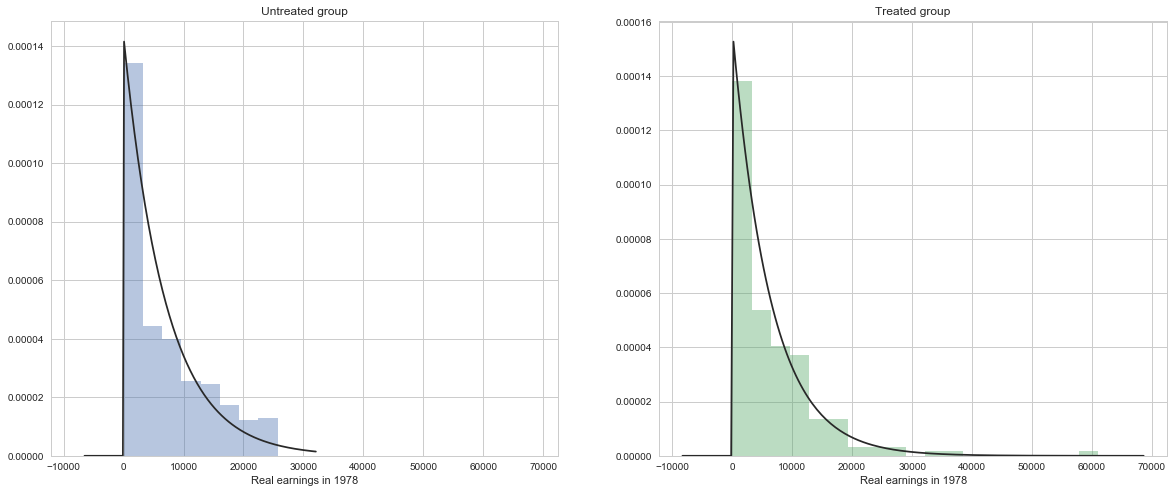

In [9]:
_, ax = plt.subplots(1, 2, figsize=(20, 8), sharex=True)

ax1, ax2 = ax

sns.distplot(untreated_78, kde=False, ax=ax1, fit=stats.expon, color='b', bins=np.linspace(0, 61000, 20))
sns.distplot(treated_78, kde=False, ax=ax2, fit=stats.expon, color='g', bins=np.linspace(0, 61000, 20))

ax1.set_title('Untreated group')
ax2.set_title('Treated group')
ax1.set_xlabel('Real earnings in 1978')
ax2.set_xlabel('Real earnings in 1978')
plt.show()

We verify the tendance with the two graphs above. Visually, more people have earned a salary of more than 15'000 in the untreated group than in the treated one. With an analysis that shallow, we cannot conclude anything that could be of great use and are left skeptical of the efficiency of such program. But taking a closer look at the data will for sure be necessary and helpful.

#### 2. A closer look at the data

In the previous part, we didn't sepreate the distribution between the treated group and the controle group. Thus, let us now compare the distribution between those two groups.

In [10]:
grouped = pd.get_dummies(df, columns=['race']).groupby("treat")
treated = grouped.get_group(1)
untreated = grouped.get_group(0)

In [11]:
binary_features = (grouped['race_black', 'race_hispanic', 'race_white', "married", "nodegree"].sum() / grouped['race_black', 'race_hispanic', 'race_white', "married", "nodegree"].count()) * 100
binary_features

,race_black,race_hispanic,race_white,married,nodegree
treat,,,,,
0,20.279720,14.219114,65.501166,51.282051,59.673660
1,84.324324,5.945946,9.729730,18.918919,70.810811


We see directly, if we group by treated presonne that there are several unbalanced features. Indeed, the above table showed use the percentage of black, hispanic and married peaple. There are only 20% of people who were black and didn't participate to the job training for 84% of where black and participate to the job training. For the hispanic people we have roughly 10% less for the treatment than for whose for the none treament which is quiete acceptable. And for the married feature, here it's also unbalanced. (See the bar plots bellow)

In [12]:
def married_school(binary_features):
    _, ax = plt.subplots(1, 2, figsize=(15, 7))

    ax1, ax2 = ax

    sns.barplot(x=binary_features.index, y=binary_features.married, ax=ax1)
    sns.barplot(x=binary_features.index, y=binary_features.nodegree, ax=ax2)
    
    [ax[i].set_ylim(0, 100) for i in range(2)]

    [ax[i].set_xticklabels(['untreated', 'treated'], rotation=0) for i in range(2)]

    [ax[i].set_xlabel('') for i in range(2)]
    [ax[i].set_ylabel('') for i in range(2)]

    ax1.set_title("Percentage of married people")
    ax2.set_title("Percentage of people not having a school degree")

    plt.show()


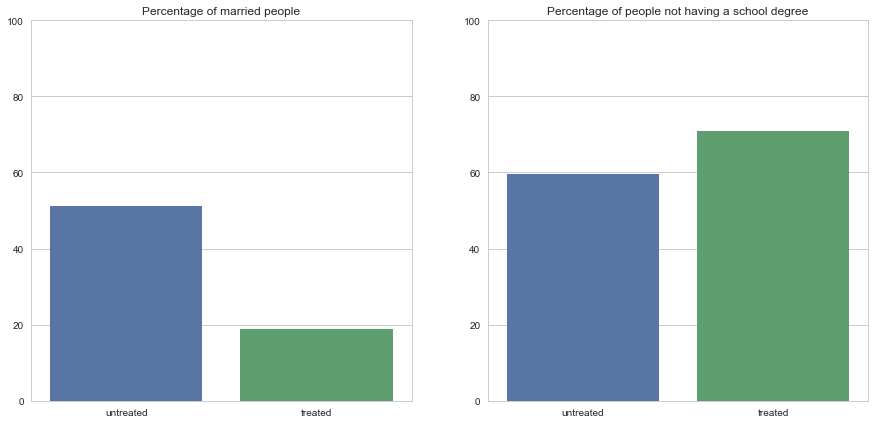

In [13]:
married_school(binary_features=binary_features)

In [14]:
def race_plot(binary_features):
    _, ax = plt.subplots(1, 3, figsize=(21, 7))

    ax1, ax2, ax3 = ax

    sns.barplot(x=binary_features.index, y=binary_features.race_black, ax=ax1)
    sns.barplot(x=binary_features.index, y=binary_features.race_hispanic, ax=ax2)
    sns.barplot(x=binary_features.index, y=binary_features.race_white, ax=ax3)

    [ax[i].set_ylim(0, 100) for i in range(3)]

    [ax[i].set_xticklabels(['untreated', 'treated'], rotation=0) for i in range(3)]

    [ax[i].set_xlabel('') for i in range(3)]


    ax1.set_title('Percentage of black people')
    ax2.set_title('Percentage of hispanic people')
    ax3.set_title('Percentage of white people')

    plt.show()

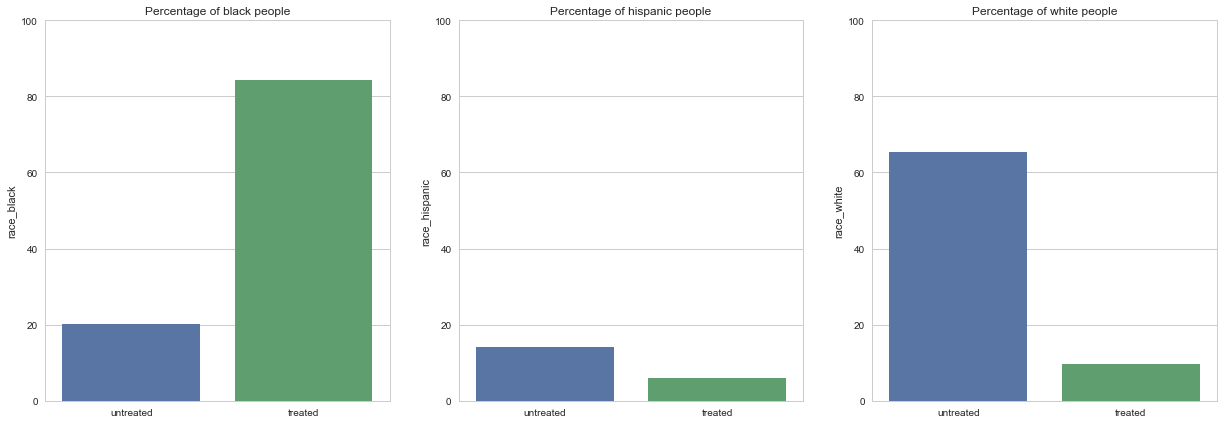

In [15]:
race_plot(binary_features)

The ratios of black and white people are very uneven between the treated and the untreated groups. This may lead to some difficulties in comparing the outcome of the observational study (more on that in part 5)

In [16]:
#Functions that given two dataframe: the untreated and the treated plots the distribution of the age and the educ feathures
def age_educ(untreated, treated):
    
    _, ax = plt.subplots(1, 2, figsize=(15, 7))

    ax1, ax2 = ax

    sns.distplot(untreated.age, color='b', kde=False, ax=ax1, bins=np.linspace(14, 56, 20), label='Untreated')
    sns.distplot(treated.age, color='g', kde=False, ax=ax1, bins=np.linspace(14, 56, 20), label='Treated')
    sns.distplot(untreated.educ, color='b', kde=False, ax=ax2, bins=np.linspace(0, 18, 20), label='Untreated')
    sns.distplot(treated.educ, color='g', kde=False, ax=ax2, bins=np.linspace(0, 18, 20), label='Treated')

    ax1.set_title('Age of both groups')
    ax2.set_title('Education of both groups')

    ax1.legend()
    ax2.legend()

    plt.show()

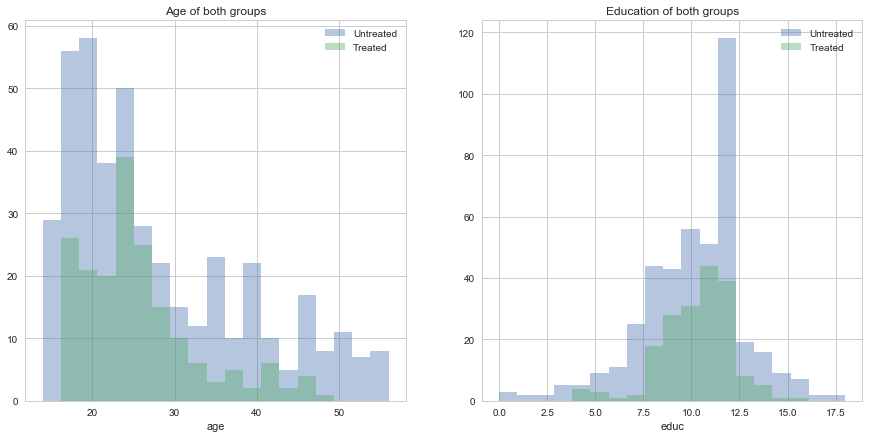

In [17]:
age_educ(untreated, treated)

From the graphs above, we can see that the distribution follows the same pattern, but the number of people having received the treatment are much higher than untreated. This is obviously explained by knowing the there is more samples of untreated people than treated people.


Let us now take a look on the people's income features :

In [18]:
def outcome(treated, untreated):
    _, ax = plt.subplots(1, 3, figsize=(21, 7), sharey='row')

    ax1, ax2, ax3 = ax

    bins = np.linspace(0, 61000, 20)

    sns.distplot(untreated.re74, kde=False, color='b', ax=ax1, bins=bins, label='Unreated')
    sns.distplot(untreated.re75, kde=False, color='b', ax=ax2, bins=bins, label='Unreated')
    sns.distplot(untreated.re78,  kde=False, color='b', ax=ax3, bins=bins, label='Unreated')
    sns.distplot(treated.re74, kde=False,  color='g', ax=ax1, bins=bins, label='Treated')
    sns.distplot(treated.re75, kde=False,  color='g', ax=ax2, bins=bins, label='Treated')
    sns.distplot(treated.re78, kde=False,  color='g', ax=ax3, bins=bins, label='Treated')

    ax1.set_title('Real earnings in 1974')
    ax2.set_title('Real earnings in 1975')
    ax3.set_title('Real earnings 1978')

    [ax[i].legend() for i in range(3)]
    [ax[i].set_xlabel('') for i in range(3)]

    plt.show()

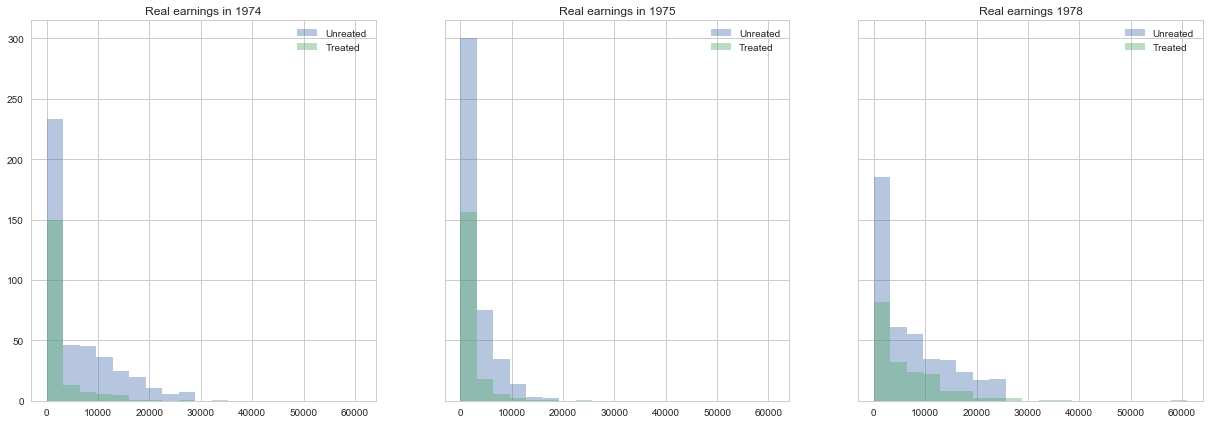

In [19]:
outcome(treated, untreated)

We see clearly that in year 78 the income of the people that particpate to the experiment raise significantly, for both the treated and untreated group. We are tempted to say that the outliers for the Treated people in 74, 75 are the same one in 78 and that the training was effectively usefull.

#### 3. A propensity score model

Having seen the disparity of the features of different people in the dataset, it is hard to conclude our analysis according to one property without taking into account all the relations between different properties such as race, marital status, etc. A good idea would therefore be to build a propensity score model, where every feature will be taken into account. Such a model will help us to get closer to a more complete and accurate explanation on the revenue difference according to the appartenance of the persons to the treated or control group.
We will do the regression for every column below, i.e. the age, the education, the race, the marital status, and the degree status.

In [20]:
def propensity_and_show(df_np,
                        feature_cols=['age', 'educ', 'race', 'married', 'nodegree'],
                        dummy_cols=['race'],
                        y_col='treat'):
    X = pd.get_dummies(df_np[feature_cols], columns=dummy_cols)
    y = df_np[y_col]
    
    logistic = LogisticRegression()
    logistic.fit(X, y)
    df_p = df_np.copy()
    df_p['prop'] = logistic.predict_proba(X)[:,1]
    
    _, ax = plt.subplots(1, 1, figsize=(10, 7))
    sns.violinplot(x=df_p.treat, y=df_p.prop, data=df_p, ax=ax)
    ax.set_xlabel('')
    ax.set_xticklabels(['Untreated', 'Treated'])
    ax.set_ylabel('Propensity')
 #   sns.plt.show()
    
    return df_p

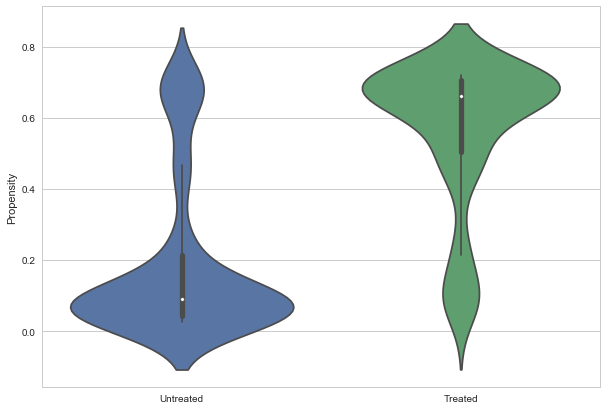

In [21]:
df_p = propensity_and_show(df)

In this violin plot, we can see that the propensity resulting of our regression is not well balanced. Indeed, untreated people tend to have a really low propensity score as the treated people have high score. In other words, each category is already separating two groups of people that don't share much features in common. We cannot really use them for the analysis. We will try to balance the prepensity in the next sections.

#### 4. Balancing the dataset via matching

In order to better draw conclusion on our data, a good step would be to balance the dataset, to make sure that we do not get biased by distinguishing treated from untreated people because of underlying relations.

We compute a bipartite graph of networkx library, putting the ids of the treated group on one side and the ids of the untreated group on the other side. We use the following weight for the edges: -abs(p1.propensity - p2.propensity). We want to match them by the closest propensity score. The use of the minus sign is due to the networkx library which only does a maximum weight mathcing.

In [22]:
def similarity_matching(data):
    B = nx.Graph()

    treatp = data[data.treat.astype(bool)].reset_index()
    ntreatp = data[~data.treat.astype(bool)].reset_index()

    B.add_nodes_from(treatp.id, bipartite=0)
    B.add_nodes_from(ntreatp.id, bipartite=1)

    for i, id1 in treatp.id.iteritems():
        for j, id2 in ntreatp.id.iteritems():
            w = -abs(treatp.iloc[i].prop - ntreatp.iloc[j].prop)
            B.add_edge(id1, id2, weight=w)
            
    return nx.max_weight_matching(B, True)

In [23]:
matching = similarity_matching(df_p)

Printing the 10 first matched elements

In [24]:
def print_matching(df_use, matching, n=10):
    print('  id1   |   p1  ->   p2  |   id2   |   diff')
    print('--------|----------------|---------|--------')
    for k, v in list(matching.items())[::2][:n]:
        pk = list(df_use[df_use.id == k].prop)[0]
        pv = list(df_use[df_use.id == v].prop)[0]
        dp = abs(pk - pv)
        print('{:>7} | {:.3f} -> {:.3f} | {:>7} | ({:.3f})'.format(k, pk, pv, v, dp))

In [25]:
print_matching(df_p, matching)

  id1   |   p1  ->   p2  |   id2   |   diff
--------|----------------|---------|--------
  NSW28 | 0.237 -> 0.103 |  PSID78 | (0.134)
PSID312 | 0.095 -> 0.095 |   NSW22 | (0.000)
  NSW37 | 0.634 -> 0.108 | PSID289 | (0.526)
 NSW152 | 0.646 -> 0.646 | PSID352 | (0.000)
 PSID96 | 0.707 -> 0.720 |   NSW95 | (0.013)
  NSW38 | 0.436 -> 0.435 |  PSID98 | (0.000)
PSID268 | 0.692 -> 0.706 |  NSW101 | (0.014)
  NSW83 | 0.085 -> 0.085 | PSID361 | (0.000)
 NSW126 | 0.488 -> 0.237 | PSID240 | (0.251)
PSID234 | 0.661 -> 0.661 |  NSW107 | (0.000)


In [26]:
def create_df_matching(df_base, matching):
    return df_base[[df_base.iloc[j].id in matching for j in range(df_base.shape[0])]]

In [27]:
df_matched = create_df_matching(df, matching)

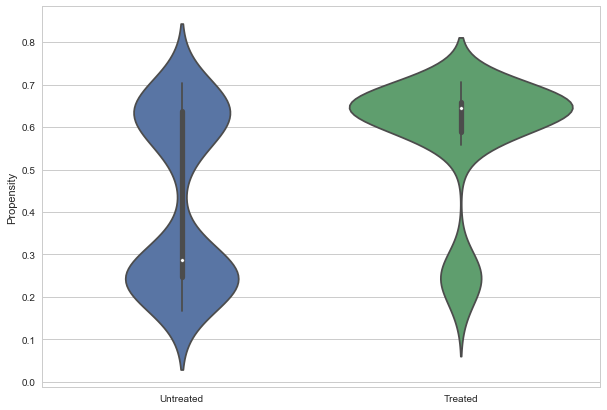

In [28]:
_ = propensity_and_show(df_matched)

We see that this is more balanced compared to the first violin plot, yet it is still not perfect. The untreated group is still affected by a disparity in some features, and the current situation is not good enough in order to perform our analysis.

Let us see now what the features distribution looks like after we matched :


In [29]:
df_matched.shape[0]

370

In [30]:
def create_binary_features_ratio(df):
    """Arrange, create the binary feature for our dataframe and
    return a Dataframe that countains the ratio of the features by group (treated or not)"""
    
    df_for_binary = pd.get_dummies(df, columns=['race']).groupby("treat")
    return (df_for_binary['race_black', 'race_hispanic', 'race_white', "married", "nodegree"].sum() / df_for_binary['race_black', 'race_hispanic', 'race_white', "married", "nodegree"].count()) * 100



In [31]:
df_for_binary = df_matched.groupby("treat")
treated_matched = df_for_binary.get_group(1)
untreated_matched = df_for_binary.get_group(0)

In [32]:
binary_features_matched = create_binary_features_ratio(df_matched)

We notice that there is still a disparity between black and non-black people, and we consider the other features to be close enough.

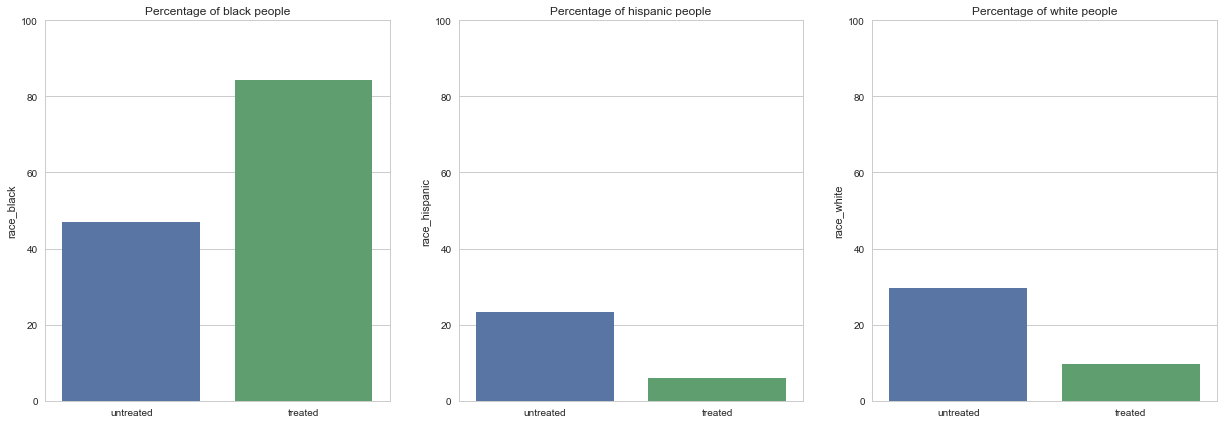

In [33]:
race_plot(binary_features_matched)

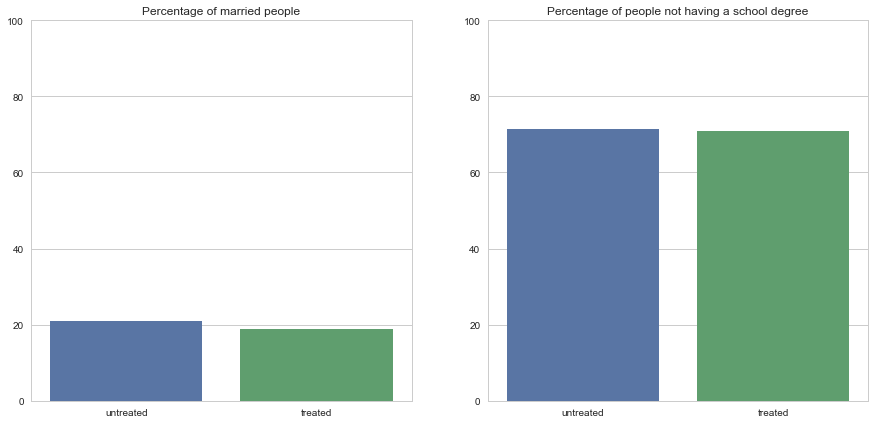

In [34]:
married_school(binary_features_matched)

For the above two features, the distribution is almost equal, which is a good sign for the outcome of our analysis.

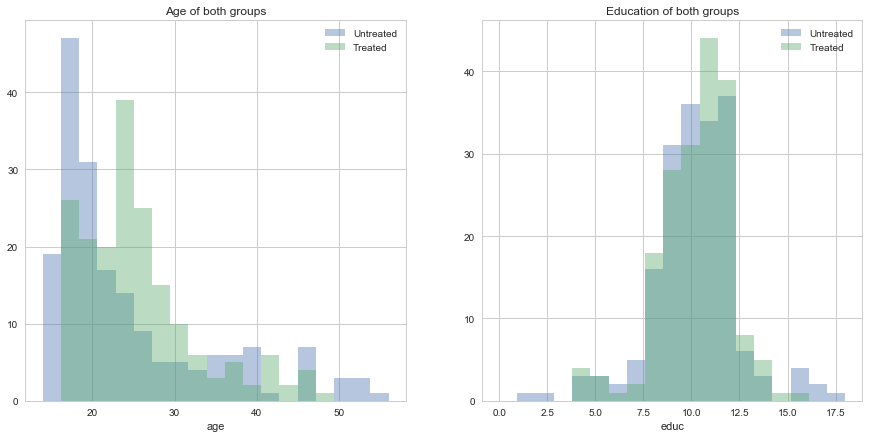

In [35]:
age_educ(treated = treated_matched, untreated = untreated_matched)

The age distribution is a bit different between the treated and not treated. We consider this factor to be less important than others and judge the current situation sufficient. Still, a slight shift of the untreated peak (18-22) to the treated one (20-25) is to be noted. The education level between both groups is almost similar, which is once again a good sign for our analysis.

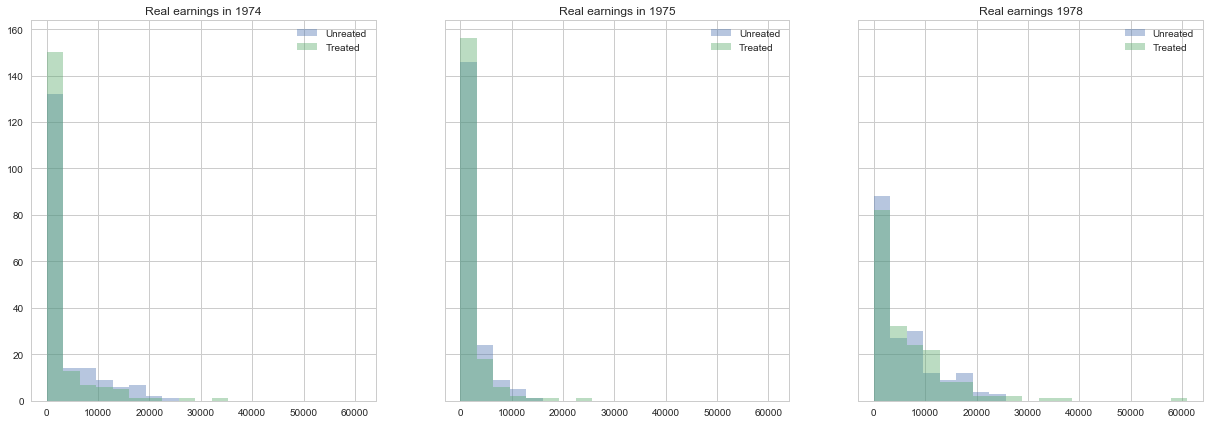

In [36]:
outcome(treated_matched, untreated_matched)

Finally, the earning of both groups is compared and we see a much closer matching of the distribution of both groups compared to the first point. We can already get a sight of the earning ratio treated/untreated being inversed from '74 to '78 : the treated group's earning growth rate is greater than the untreated one.

#### 5. Balancing the groups further

We want to get rid of this inequality in the race, which means getting less people in the matched set, but it will ultimately improve our propensity balancing. First we use the matching for non-black people, then we use it for black people only. 

In [37]:
df_nblack = df_p[df_p.race != 'black']
df_black = df_p[df_p.race == 'black']

matching_nblack = similarity_matching(df_nblack)
matching_black = similarity_matching(df_black)

In [38]:
df_nblack_matched = create_df_matching(df_nblack, matching_nblack)
df_black_matched = create_df_matching(df_black, matching_black)

df_merged_matched = df_nblack_matched.append(df_black_matched)

In [39]:
print('{} people in the experience'.format(df_p.shape[0]))
print('{} people matched by propensity'.format(df_matched.shape[0]))
print('{} people matched by propensity by first separating by race then remerged'.format(df_merged_matched.shape[0]))

614 people in the experience
370 people matched by propensity
232 people matched by propensity by first separating by race then remerged


Above is the number of people that was matched compared to the initial number. We end up with 232 people matched by propensity and separation by race. This number is smaller than the original one but is still of sufficient size to keep its significance. The upcome of such reduction is a much fairer set that is described below :

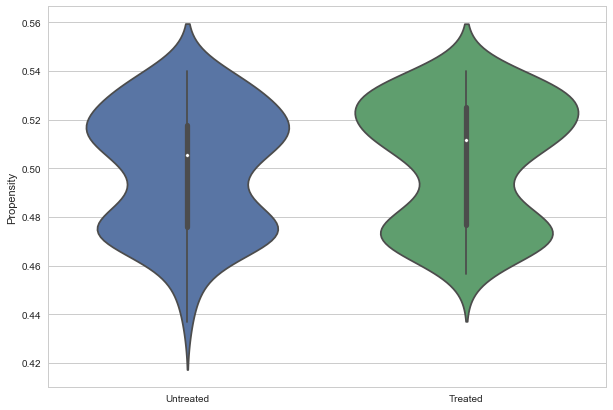

In [40]:
_ = propensity_and_show(df_merged_matched)

We now see that it was really useful not to match black people with non-black people, since our propensity is really close for both groups. This means we can now use this model to do an analysis of the program.

In [41]:
df_merged_matched.head()

,id,treat,age,educ,married,nodegree,re74,re75,re78,race,prop
1,NSW2,1,22,9,0,1,0.0,0.0,3595.894,hispanic,0.225260
9,NSW10,1,33,12,1,0,0.0,0.0,12418.070,white,0.037557
21,NSW22,1,41,14,0,0,0.0,0.0,5149.501,white,0.095316
22,NSW23,1,38,9,0,1,0.0,0.0,6408.950,white,0.102300
27,NSW28,1,27,10,0,1,0.0,0.0,11142.870,hispanic,0.236971


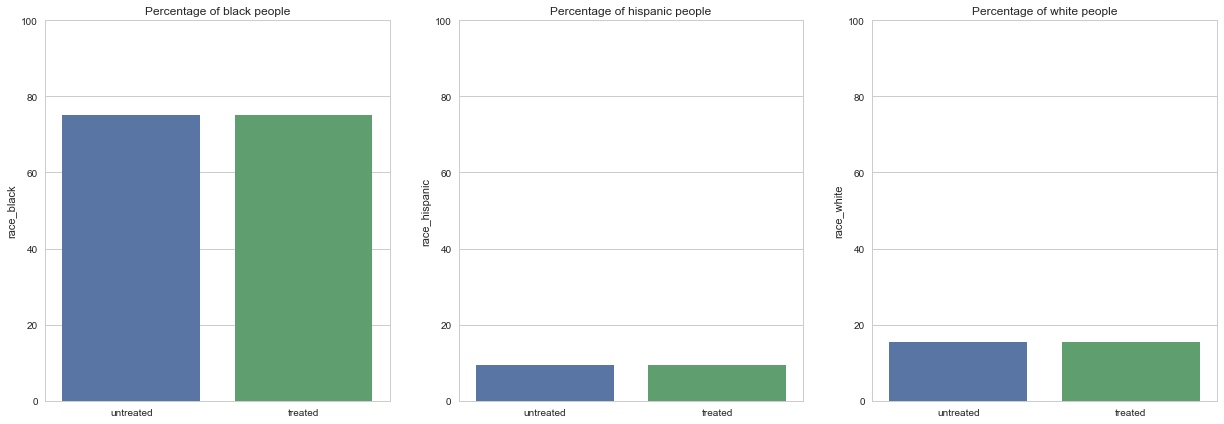

In [42]:
race_plot(create_binary_features_ratio(df_merged_matched))

Everything looks blanced now ! We can finally get a closer a better look at our data and draw much more valid conclusions on it.

#### 6. A less naive analysis

After having spend time on better data selection with the matching, we can have a final look on our problem and observe the difference in output.

In [43]:
df_good = df_merged_matched

In [44]:
df_good_by_treat = df_good[["treat", "re78"]].groupby(by="treat")
df_good_by_treat.describe()

re78                                                        \
       count         mean          std  min          25%       50%   
treat                                                                
0      116.0  4917.682980  6016.745447  0.0     0.000000  2366.579   
1      116.0  6505.600705  6760.724295  0.0  1018.794975  4878.238   

                              
               75%       max  
treat                         
0       7588.49525  25564.67  
1      10256.46000  36646.95

The mean, median, max and other quartiles are really different from the untreated to the treated group. We will now show the updated histograms for the real earnings of 1978.

In [45]:
df_good = df_merged_matched
treated_good_78 = df_good_by_treat.get_group(1)["re78"]
untreated_good_78 = df_good_by_treat.get_group(0)["re78"]

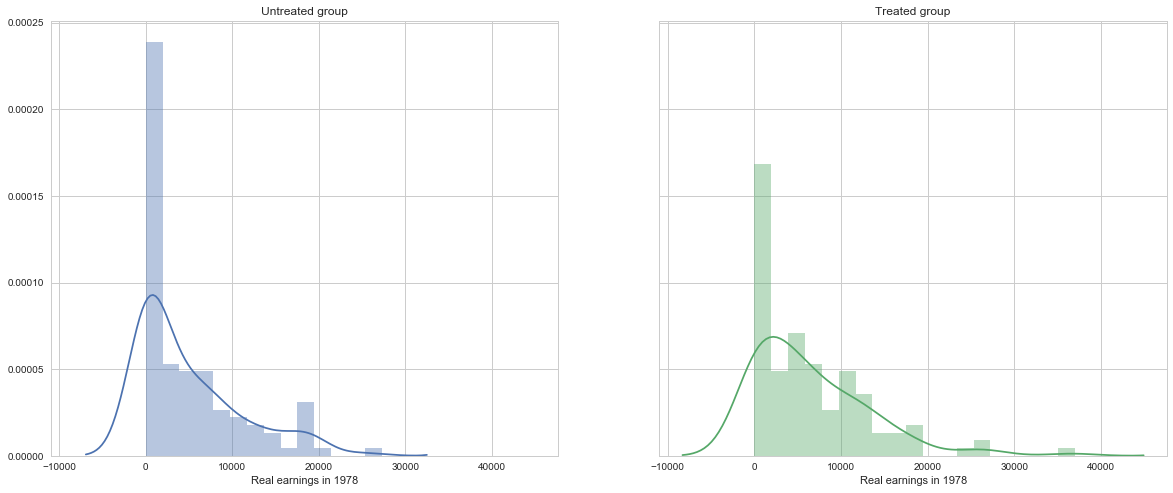

In [46]:
_, ax = plt.subplots(1, 2, figsize=(20, 8), sharex=True, sharey=True)

ax1, ax2 = ax

sns.distplot(untreated_good_78, ax=ax1, color='b', bins=np.linspace(0, 37000, 20))
sns.distplot(treated_good_78, ax=ax2, color='g', bins=np.linspace(0, 37000, 20))

ax1.set_title('Untreated group')
ax2.set_title('Treated group')
ax1.set_xlabel('Real earnings in 1978')
ax2.set_xlabel('Real earnings in 1978')

plt.show()

The blue distribution is more concentrated around the small values, while the green one shows a bigger distribution for values $\geq$ 3000. With this, we can finally conclude that the treatment was indeed useful. With a sample of the population much more fair in the two groups, the result of the program underlines greater earnings for people having been treated that those that have not !

We now know how important it is to really understand the data in order to not draw conclusions that may appear clear at first glance. 

# Question 2: Applied ML
#### 1.

In [47]:
from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

In [48]:
newsgroups_train.target[:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(newsgroups_train.data)
vectors.shape

(11314, 130107)

In [50]:
sz = newsgroups_train.target.shape[0]
tr_sz = int(sz * 0.1)
vl_sz = tr_sz
te_sz = sz - tr_sz - vl_sz

In [51]:
X_tr = vectors[:tr_sz]
X_vl = vectors[tr_sz:tr_sz+vl_sz]
X_te = vectors[-te_sz:]

y_tr = newsgroups_train.target[:tr_sz]
y_vl = newsgroups_train.target[tr_sz:tr_sz+vl_sz]
y_te = newsgroups_train.target[-te_sz:]

#### 2.

In [52]:
max_depths = [1]#np.logspace(1, 2, 4).astype(int)
n_estimatorss = [1001]#np.logspace(3, 4, 4).astype(int)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [54]:
def compute_accuracy(y_pred, y):
    print(y_pred[:10])
    print(y[:10])
    bad = np.count_nonzero(y_pred - y)
    total = y.shape[0]
    return 1 - bad / total

In [55]:
best_max_depth = 0
best_n_estimator = 0
best_prediction = 0

for max_depth in max_depths:
    for n_estimators in n_estimatorss:
        print(max_depth, n_estimators)
        
        forest = RandomForestClassifier(max_depth=None, n_estimators=n_estimators)
        forest.fit(X_tr, y_tr)
        
        prediction = metrics.accuracy_score(forest.predict(X_vl), y_vl)
        
        if prediction > best_prediction:
            best_prediction = prediction
            best_n_estimator = n_estimators
            best_max_depth = max_depth

1 1001


In [56]:
best_max_depth, best_n_estimator

(1, 1001)

In [57]:
best_prediction

0.72148541114058351